## Setup & GPU Monitoring

In [24]:
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

%matplotlib inline

p.connect(p.DIRECT)
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())
#optionally enable GPU for faster rendering in pybullet.getCameraImage
enableGPU = True

import GPUtil as GPU
import sys
# Get all device ids and their processing and memory utiliazion
# (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

# Print os and python version information
print('OS: ' + sys.platform)
print(sys.version)

# Print package name and version number
print(GPU.__name__ + ' ' + GPU.__version__)

# Show the utilization of all GPUs in a nice table
GPU.showUtilization()

# Show all stats of all GPUs in a nice table
GPU.showUtilization(all=True)

OS: linux
3.11.8 (main, Feb 26 2024, 21:39:34) [GCC 11.2.0]
GPUtil 1.4.0
| ID | GPU | MEM |
------------------
| ID | Name | Serial | UUID || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
--------------------------------------------------------------------------------------------------------------------------------------------------


## Path To URDF File & Check If Exists

In [25]:
path_to_urdf = "../../simulation/environment/robot_description/urdf/prosthesis_v1.urdf"

In [26]:
import os

os.path.exists(path_to_urdf)

True

## Camera View Rendering

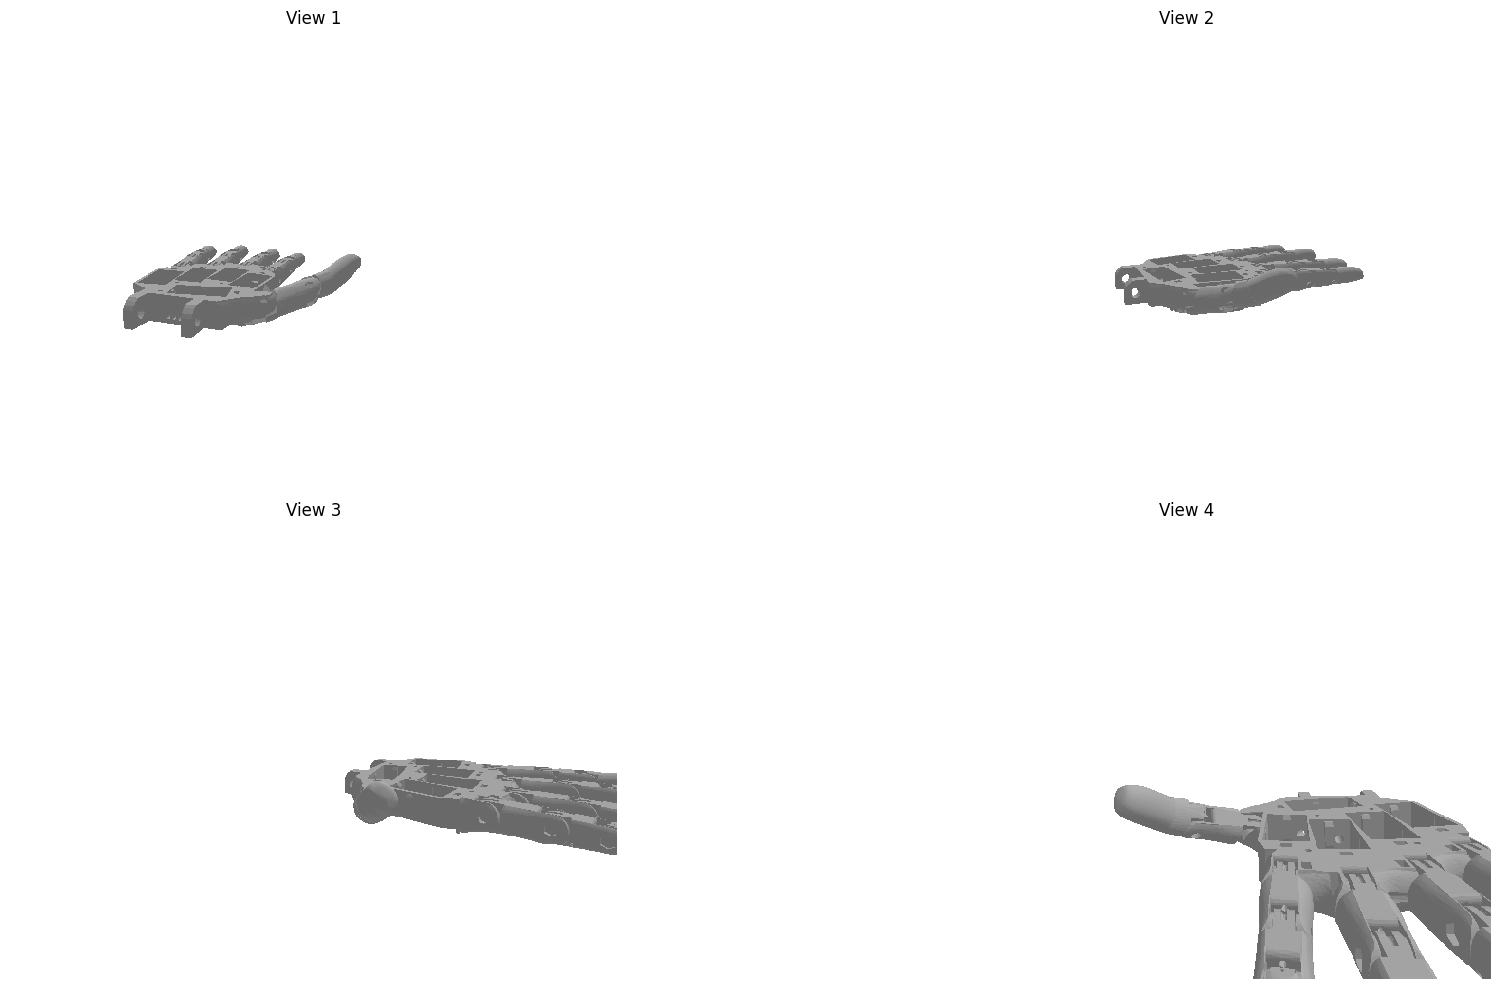

In [29]:
import numpy as np
import time
from matplotlib import pyplot as plt

import pybullet as p

# Set up the simulation environment
p.resetSimulation()
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
useFixedBase = True
p.setGravity(0, 0, -10)

cubeStartPos = [0, 0, 0]
cubeStartOrientation = p.getQuaternionFromEuler([0, 0, 0])

robotId = p.loadURDF(
    path_to_urdf,  # Make sure to provide the actual path to the URDF file
    cubeStartPos,
    cubeStartOrientation,
    flags=p.URDF_USE_INERTIA_FROM_FILE,
)

# Set up the plotting environment
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for i in range(4):
    p.stepSimulation()  # Simulate physics
    time.sleep(1.0 / 240.0)  # Control simulation speed

    camTargetPos = [0, 0, 0]
    cameraUp = [0, 0, 1]
    cameraPos = [1, 1, 1]

    yaw = 60 * (i % 4)
    pitch = -10.0
    roll = 0
    upAxisIndex = 2
    camDistance = 0.25
    pixelWidth = 640
    pixelHeight = 480
    nearPlane = 0.01
    farPlane = 100
    fov = 60

    # Compute camera matrices
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

    # Fetch camera images
    img_arr = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix, projectionMatrix)
    np_img_arr = np.reshape(img_arr[2], (img_arr[1], img_arr[0], 4))
    np_img_arr = np_img_arr * (1. / 255.)

    # Plot the image
    ax = axs[i // 2, i % 2]
    ax.imshow(np_img_arr, interpolation='none', animated=True)
    ax.set_title(f"View {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()